# `Final Exam`, `Fall 2022`: `Time Series Analysis of US Inflation`
_Version 1.0.1_

Change history:   
1.0.1 - bugfix ex2 test code.  
1.0 - initial release  

*All of the header information is important. Please read it..*

**Topics, number of exercises:** This problem builds on your knowledge of Pandas, Numpy, basic Python data structures, and implementing mathematical functions. It has **9** exercises, numbered 0 to **8**. There are **18** available points. However, to earn 100% the threshold is **13** points. (Therefore, once you hit **13** points, you can stop. There is no extra credit for exceeding this threshold.)

**Exercise ordering:** Each exercise builds logically on previous exercises, but you may solve them in any order. That is, if you can't solve an exercise, you can still move on and try the next one. Use this to your advantage, as the exercises are **not** necessarily ordered in terms of difficulty. Higher point values generally indicate more difficult exercises. 

**Demo cells:** Code cells starting with the comment `### define demo inputs` load results from prior exercises applied to the entire data set and use those to build demo inputs. These must be run for subsequent demos to work properly, but they do not affect the test cells. The data loaded in these cells may be rather large (at least in terms of human readability). You are free to print or otherwise use Python to explore them, but we did not print them in the starter code.

**Debugging your code:** Right before each exercise test cell, there is a block of text explaining the variables available to you for debugging. You may use these to test your code and can print/display them as needed (careful when printing large objects, you may want to print the head or chunks of rows at a time).

**Exercise point breakdown:**

- Exercise 0: **1** point(s)
- Exercise 1: **1** point(s)
- Exercise 2: **2** point(s)
- Exercise 3: **2** point(s)
- Exercise 4: **2** point(s)
- Exercise 5: **2** point(s)
- Exercise 6: **2** point(s)
- Exercise 7: **3** point(s)
- Exercise 8: **3** point(s)

**Final reminders:** 

- Submit after **every exercise**
- Review the generated grade report after you submit to see what errors were returned
- Stay calm, skip problems as needed, and take short breaks at your leisure


## Background Inflation

Inflation is an increase in overall prices in an economy over time. Deflation is "negative inflation", a decrease in prices over time. A common way to measure inflation is to first calculate the CPI (price of a representative basket of goods), then compute the difference in CPI over a time interval. In other words if the CPI is 100 at one point in time, and the CPI is 105 one year later then we would say that the inflation rate over that year was 5%.

## Data

We have obtained the US CPI for each month going back to the early 20th century from The Organisation for Economic Co-operation and Development. 

## Analysis goals
- Use the CPI data to calculate the inflation rate at any point in history over an arbitrary number of months.
- Attempt to predict the inflation rate in future months based on the inflation rate in previous months using exponential smoothing models.
    - Evaluate how "good" the predictions are.
    - Tune the models to pick the best parameters.
    - Make inferences based on the selected parameters.

In [1]:
### Global Imports
###
### AUTOGRADER TEST - DO NOT REMOVE
###
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

## Exercise 0 - (**1** Points): 
To start things off we will load the CPI data into the notebook environment. You do not need to modify the cell below, just execute the test and collect your free point!

This cell will also display the first few rows and last few rows of the CPI data we just loaded.

In [2]:
cpi_all_df = pd.read_csv('resource/asnlib/publicdata/cpi_urban_all.csv')
display(cpi_all_df.head())
display(cpi_all_df.tail())

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,,
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,,
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,,
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,,
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,,


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233,250.089,252.125
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474,257.557,260.065
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,266.236,275.703
109,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,,,288.347,


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 0. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [3]:
### test_cell_ex0
###
### AUTOGRADER TEST - DO NOT REMOVE
###
assert 'cpi_all_df' in globals()
assert isinstance(cpi_all_df, pd.DataFrame)
print('Passed! Please submit.')

Passed! Please submit.


## Exercise 1 - (**1** Points): 
The raw data needs some light cleaning. There are some columns which we do not need for analysis, some of the numerical columns have blanks, and (due to the blanks) some numerical columns are the wrong type. We need to correct these issues before moving forward.

Define the function `cleanup_df(df, drop_cols)`. Input `df` is a DataFrame and `drop_cols` is a list of column names **which may or may not** appear in `df`. 

Your function should return a new DataFrame having the same contents as `df` with the following exceptions:  
- All columns included in `drop_cols` should be dropped.  
    - Your function **should not** raise an error if a column in `drop_cols` does not appear in `df`.
- All cells which contain the value `' '` should be replaced with `np.nan`.
- All columns with month abbreviations for names (`Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec`) should be converted to `float64`.


In [4]:
### Define demo inputs
demo_df_ex1 = cpi_all_df.tail().reset_index(drop=True)
display(demo_df_ex1)
demo_drop_cols_ex1 = ['HALF1', 'HALF2', 'THIS COLUMN DOESN\'T EXIST']

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233,250.089,252.125
1,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903
2,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474,257.557,260.065
3,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,266.236,275.703
4,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,,,288.347,


<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
  
|    |   Year |     Jan |     Feb |     Mar |     Apr |     May |     Jun |     Jul |     Aug |     Sep |     Oct |     Nov |     Dec |  
|---:|-------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|  
|  0 |   2018 | 247.867 | 248.991 | 249.554 | 250.546 | 251.588 | 251.989 | 252.006 | 252.146 | 252.439 | 252.885 | 252.038 | 251.233 |  
|  1 |   2019 | 251.712 | 252.776 | 254.202 | 255.548 | 256.092 | 256.143 | 256.571 | 256.558 | 256.759 | 257.346 | 257.208 | 256.974 |  
|  2 |   2020 | 257.971 | 258.678 | 258.115 | 256.389 | 256.394 | 257.797 | 259.101 | 259.918 | 260.28  | 260.388 | 260.229 | 260.474 |  
|  3 |   2021 | 261.582 | 263.014 | 264.877 | 267.054 | 269.195 | 271.696 | 273.003 | 273.567 | 274.31  | 276.589 | 277.948 | 278.802 |  
|  4 |   2022 | 281.148 | 283.716 | 287.504 | 289.109 | 292.296 | 296.311 | 296.276 | 296.171 | 296.808 | 298.012 | NaN     | NaN     |

Notice:  
- The columns 'HALF1' and 'HALF2' were dropped.
- There was no error for trying to drop 'THIS COLUMN DOESN'T EXIST' which does not exist in `df`.
- The blanks are replaced with `np.nan` (which displays as 'NaN'). FYI `np.nan` is a `float`.

Notes:
- Check the `dtypes` attribute of your result. Columns which are months ('Jan', 'Feb', ...) should be `float64`. Any other remaining columns should have the same `dtype` as the original column in the input.

In [19]:
### Exercise 1 solution
def cleanup_df(df, drop_cols):
    
    df = df.drop([x for x in drop_cols if x in df.columns], axis=1)
    df.replace(' ', np.nan, inplace=True)
    
    return df


#     df_copy = df.copy()
#     clean_df = df_copy.drop(columns=drop_cols, errors='ignore').replace(' ', np.nan)
#     months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#     for m in months: 
#         clean_df[m].astype('float64')
#     return clean_df
    
### demo function call
demo_output_ex1 = cleanup_df(demo_df_ex1, demo_drop_cols_ex1)
display(demo_output_ex1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
1,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
2,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
3,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802
4,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,NaN,NaN


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 1. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [20]:
### test_cell_ex1
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_1', 
    'func': cleanup_df, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'df':{
            'dtype':'pd.DataFrame', # data type of param.
            'check_modified':True,
        },
        'drop_cols':{
            'dtype':'list', # data type of param.
            'check_modified':True,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'pd.DataFrame',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-10)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## Exercise 2 - (**2** Points): 
To complete our time series analysis we need to reshape the data into a proper time series. By using earlier functions we are able to pare down the data into this form:

|    |   Year |     Jan |     Feb |     Mar |     Apr |     May |     Jun |     Jul |     Aug |     Sep |     Oct |     Nov |     Dec |  
|---:|-------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|  
|  2 |   2020 | 257.971 | 258.678 | 258.115 | 256.389 | 256.394 | 257.797 | 259.101 | 259.918 | 260.28  | 260.388 | 260.229 | 260.474 |  
|  3 |   2021 | 261.582 | 263.014 | 264.877 | 267.054 | 269.195 | 271.696 | 273.003 | 273.567 | 274.31  | 276.589 | 277.948 | 278.802 |  
|  4 |   2022 | 281.148 | 283.716 | 287.504 | 289.109 | 292.296 | 296.311 | 296.276 | 296.171 | 296.808 | 298.012 | NaN     | NaN     |  

We want to further transform it into a single dimension in chronological order. (i.e. all the data points for 2020 followed by all the data points for 2021 followed by all the data points for 2022.)

**Note**: In the example above there are no records for November and December of 2022 (because they have not concluded at the writing of this exam).  
- For most months out of the year there will be missing values _at the end_ of the time interval.  
    - Our solution should handle this gracefully.  
- However, missing values _in the middle or at the start_ of the time interval are not expected and indicate an invalid input.  
    - Our solution should take care of this validation.

Define the function `to_ts(df)`. The input `df` can be assumed to have the following characteristics:  
- It's columns will be `'Year' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec'` in that particular order. 
- All of the "month" columns will be type `float64`.
- There may be some missing values which will be populated with `np.nan`. 
- The records will be sorted by the `'Year'` column in ascending order.

Your function should return a new Array or `None` by implementing this logic:
- Extract the values for the "month" columns only into a 2-D array.
- Flatten it to a 1-D array such that each data point is in chronological order.
- Handle the missing values.
    - Identify the index of all missing values in the 1-D array.
    - Identify the largest index of a non-missing value in the 1-D array.
    - If there are missing values anywhere except the end of the 1-D array, return `None`
    - Otherwise, return the 1-D array with the missing values removed from the end.

In [21]:
### Define demo inputs

demo_df_ex2 = \
pd.DataFrame([[2021,261.582,263.014, 264.877, 267.054, 269.195, 271.696, 273.003, 273.567, 274.31, 276.589, 277.948, 278.802],
            [2022, 281.148, 283.716, 287.504, 289.109, 292.296, 296.311, 296.276, 296.171, 96.808, 298.012, np.nan, np.nan]], 
            columns=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

demo_invalid_df_ex2 = \
pd.DataFrame([[2021,261.582,263.014, np.nan, 267.054, 269.195, 271.696, 273.003, 273.567, 274.31, 276.589, 277.948, 278.802],
            [2022, 281.148, 283.716, 287.504, 289.109, 292.296, 296.311, 296.276, 296.171, 96.808, 298.012, np.nan, np.nan]], 
            columns=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
Demo output
[261.582 263.014 264.877 267.054 269.195 271.696 273.003 273.567 274.31
 276.589 277.948 278.802 281.148 283.716 287.504 289.109 292.296 296.311
 296.276 296.171  96.808 298.012]

Demo handling invalid input
None
```
The demo runs your solution first on a `df` input with missing values only at the end (an array is expected as output). Then runs it on a `df` input with a missing value in the middle (`None` is expected as output). 

In [29]:
### Exercise 2 solution
def to_ts(df):
    assert (['Year'] + 'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()) == list(df.columns)
    
    col = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    arr = df[col].values
    
    flat_arr = arr[:,:].flatten()
    
    if np.isnan(flat_arr).any():
        
        largest_non_missing_ind = np.max(np.where(~np.isnan(flat_arr)))
        
        if np.isnan(flat_arr[:largest_non_missing_ind+1]).any():
            return None
        
        else:
            return flat_arr[:largest_non_missing_ind+1]
        
    else:
        return flat_arr
    
    
#     ts = df.drop(columns='Year', axis = 1).values
#     ts = ts.reshape((-1,))
#     missing = np.argwhere(np.isnan(ts)).reshape((-1,))
#     not_missing = np.argwhere(~np.isnan(ts)).max()
#     if (not_missing > missing).any():
#         return None
#     index= not_missing +1
#     ts = ts[:index]
#     return ts

### demo function call
demo_output_ex2 = to_ts(demo_df_ex2)
demo_invalid_ex2 = to_ts(demo_invalid_df_ex2)
print('Demo output')
print(demo_output_ex2)
print()
print('Demo handling invalid input')
print(demo_invalid_ex2)

Demo output
[261.582 263.014 264.877 267.054 269.195 271.696 273.003 273.567 274.31
 276.589 277.948 278.802 281.148 283.716 287.504 289.109 292.296 296.311
 296.276 296.171  96.808 298.012]

Demo handling invalid input
None


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 2. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [30]:
### test_cell_ex2
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_2', 
    'func': to_ts, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'df':{
            'dtype':'pd.DataFrame', # data type of param.
            'check_modified':True,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'np.ndarray',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-10)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(200):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## Exercise 3 - (**2** Points):
Eventually, we are going to plot some of the time series data, so we will need a date axis to provide context for users. We can extract this from our source DataFrame.

Define the function `date_series(df, n)`. The input `df` will have these columns `['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']` in that order. Also the `'Year'` column will be sorted in ascending order. We are unconcerned with the values or types in any other columns. The input `n` will be a positive integer smaller than `12*df.shape[0]`.  

Your function should return a Pandas Series with dtype of `datetime64` containing the timestamp for midnight on the first day of the first `n` months represented in `df`. The [`pd.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function is useful in converting the dates.

In [31]:
### Define demo inputs
demo_df_ex3 = pd.DataFrame(columns=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
demo_df_ex3['Year'] = [1961, 1962, 1963]
demo_n_ex3 = 14
display(demo_df_ex3)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
0    1961-01-01
1    1961-02-01
2    1961-03-01
3    1961-04-01
4    1961-05-01
5    1961-06-01
6    1961-07-01
7    1961-08-01
8    1961-09-01
9    1961-10-01
10   1961-11-01
11   1961-12-01
12   1962-01-01
13   1962-02-01
dtype: datetime64[ns]
```
Notice that the items are `datetime64` and not strings.

In [32]:
### Exercise 3 solution
def date_series(df, n):
    
    years = df['Year'].unique()
    
    month_strings = [f'{year}-{month:02d}-01' for year in years for month in range(1,13)][:n]
    
    timestamps = pd.to_datetime(month_strings) 
    
    return pd.Series(timestamps)


#     date_list = []
#     for y in df['Year']:
#         for m in range(1,13):
#             date_list.append(f'{y}-{m}-01')
#     dates = pd.Series(date_list[:n])
#     dates = pd.to_datetime(dates)
#     return dates

### demo function call
demo_output_ex3 = date_series(demo_df_ex3, demo_n_ex3)
demo_output_ex3

0    1961-01-01
1    1961-02-01
2    1961-03-01
3    1961-04-01
4    1961-05-01
5    1961-06-01
6    1961-07-01
7    1961-08-01
8    1961-09-01
9    1961-10-01
10   1961-11-01
11   1961-12-01
12   1962-01-01
13   1962-02-01
dtype: datetime64[ns]

<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 3. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [33]:
### test_cell_ex3
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_3', 
    'func': date_series, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'df':{
            'dtype':'pd.DataFrame', # data type of param.
            'check_modified':True,
        },
        'n':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'pd.Series',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## Exercise 4 - (**2** Points): 
We have the CPI data re-organized into a time series. We are concerned with inflation, which is the multiplicative change in CPI over some time interval. We will need to transform the data a final time to get an inflation time series.

Define the function `multiplicative_change(ts, lag)`. The input `ts` is a 1-D array of floats representing monthly observations of the CPI. The input `lag` is an integer indicating the time interval we want to measure inflation over in months. 

Your function should implement the following formula to calculate $\hat{x}$ and return the result as a 1-D array. In the mathematical notation $x$ is `ts`, and $\ell$ is `lag`:
$$\hat{x_i} = \frac{x_i - x_{i-\ell}}{x_{i-\ell}}$$

Note that by this definition the first $\ell$ (or `lag`) entries in $\hat{x}$ are undefined. The output will start with the first defined value.

In [34]:
### Define demo inputs
demo_ts_ex4 = np.array([100., 150., 180., 216., 324.])

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
lag of 1
[0.5 0.2 0.2 0.5]

lag of 2
[0.8  0.44 0.8 ]
```
<!-- Include any shout outs here -->

In [115]:
### Exercise 4 solution
def multiplicative_change(ts, lag):
    
    x_hat = np.zeros_like(ts)
    
    for i in range(lag, len(ts)):
        x_hat[i] = ts[i] - ts[i-lag]
        x_hat[i] /= ts[i-lag]
    
    return x_hat[lag:]
    
    #return (ts[lag:] - ts[:-lag])/ts[:-lag]

### demo function call
demo_output_ex4_lag_1 = multiplicative_change(demo_ts_ex4, 1)
demo_output_ex4_lag_2 = multiplicative_change(demo_ts_ex4, 2)
print('lag of 1')
print(demo_output_ex4_lag_1)
print()
print('lag of 2')
print(demo_output_ex4_lag_2)

lag of 1
[0.5 0.2 0.2 0.5]

lag of 2
[0.8  0.44 0.8 ]


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 4. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [116]:
### test_cell_ex4
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_4', 
    'func': multiplicative_change, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'ts':{
            'dtype':'np.ndarray', # data type of param.
            'check_modified':True,
        },
        'lag':{
            'dtype':'int', # data type of param.
            'check_modified':True,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## On time-series analysis
The following two exercises will focus on implementing two triple time-series analysis techniques, triple and double exponential smoothing. The high level idea for simple smoothing is that we will make an initial guess, compare it with the observation, and use that information to improve our guess on the following observation. For double smoothing, we will do this on two levels - adjusting successive guesses for the observations themselves as well as for the difference between observations in an attempt to capture any trends in our model.

## Exercise 5 - (**2** Points): 
This is the formula for our application of simple exponential smoothing. In the math notation $x_t$ is `ts[t]`, and $\hat{x_t}$ is our prediction for $x_t$:   

Initial conditions  
- $s_0 = x_0$.                This is our initial guess.  
- $\hat{x_0}$ is undefined.   We can't call the first guess a prediction since it's actually the first observation.  

For $t > 0$  
- $s_t = \alpha(x_{t}) + (1-\alpha)s_{t-1}$  
- $\hat{x_t} = s_{t-1}$

When $\alpha$ is closer to 1 the model is more sensitive to recent observations. When $\alpha$ is closer to 0 the model is more sensitive to past observations.

Define the function `simple_exp_smoothing(ts, alpha)`. The input `ts` will be a 1-D numerical array (the vector $x$ from the formula above), and the input `alpha` (the scalar $\alpha$ from the formula above) will be a floating point number between 0 and 1. 

Your function should implement the formula above and return the vector $\hat{x}$ as a 1-D array.   
- Since $\hat{x_0}$ is undefined, the first element in your result should be `np.nan`.  
- Since $\hat{x}_{n+1}$ is well-defined for $x \in \mathcal{R}^n$, your result should have exactly one more element than the input `ts`.

In [6]:
### Define demo inputs

demo_ts_ex5 = np.array([100., 105., 120., 110., 115.])

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
[ nan 100. 105. 120. 110. 115.]
[ nan 100. 100. 100. 100. 100.]
[ nan 100. 102.5 111.25 110.625 112.8125]
```
The demo below will run your solution 3 times with `alpha` values of `1`, `0`, and `0.5`.

In [7]:
### Exercise 5 solution
def simple_exp_smoothing(ts, alpha):
    
    n = len(ts)
    
    s = np.zeros(n)
    s[0] = ts[0]
    
    for t in range(1, len(ts)):
        s[t] = alpha * ts[t] +(1-alpha) * s[t-1]
    
    x_hat = np.zeros(n+1)
    x_hat[0] = np.nan
    x_hat[1:] = s
    
    return x_hat
    
#     x_hat = [0]*(len(ts)+1) 
#     x_hat[0] = np.nan
#     s = [0]*(len(ts))
#     s[0] = ts[0]
#     x_hat[1] = s[0]
#     for i in range(1, len(ts)):
#         s[i] = alpha*ts[i] + (1-alpha)*s[i-1]
#         x_hat[i+1] = s[i]
#     return np.array(x_hat)

### demo function call
print(simple_exp_smoothing(demo_ts_ex5, 1))
print(simple_exp_smoothing(demo_ts_ex5, 0))
print(simple_exp_smoothing(demo_ts_ex5, 0.5))

[ nan 100. 105. 120. 110. 115.]
[ nan 100. 100. 100. 100. 100.]
[     nan 100.     102.5    111.25   110.625  112.8125]


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 5. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [137]:
### test_cell_ex5
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_5', 
    'func': simple_exp_smoothing, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'ts':{
            'dtype':'np.ndarray', # data type of param.
            'check_modified':True,
        },
        'alpha':{
            'dtype':'float', # data type of param.
            'check_modified':True,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'np.ndarray',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## Exercise 6 - (**2** Points): 
Now we will implement double exponential smoothing. For our implementation the formula is as follows:

- $s_0 = x_0$  
- $b_0 = 0$  
- $\hat{x}_0$ is undefined  

For $t > 0$:  
- $s_t = \alpha x_{t} + (1-\alpha)(s_{t-1} + b_{t-1})$  
- $b_t = \beta (s_t - s_{t-1}) + (1-\beta)b_{t-1}$  
- $\hat{x}_{t} = s_{t-1} + b_{t-1}$  

Define the function `double_exp_smoothing(ts, alpha, beta)`. The input `ts` will be a 1-D numerical array (the vector $x$ from the formula above), and the inputs `alpha` and `beta` (the scalars $\alpha$ and $\beta$ from the formula above) will be floating point numbers between 0 and 1. 

Your function should implement the formula above and return the vector $\hat{x}$ as a 1-D array.   
- Since $\hat{x_0}$ is undefined, the first element in your result should be `np.nan`.  
- Since $\hat{x}_{n+1}$ is well-defined for $x \in \mathcal{R}^n$, your result should have exactly one more element than the input `ts`.

In [141]:
### Define demo inputs

demo_ts_ex6 = np.array([100., 105., 120., 110., 115.])

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
[nan 100. 102.5   111.25     110.625      112.8125]
[nan 100. 105.    122.5      120.         118.75]
[nan 100. 103.75  117.1875   117.109375   119.04296875]
[nan 100. 101.875 109.296875 112.45117188 116.38549805]
```
The demo below performs 4 runs with your solution. Each run with different `alpha` or `beta` parameters.

In [158]:
### Exercise 6 solution
def double_exp_smoothing(ts, alpha, beta):
    
    n = len(ts)
    s = np.zeros(n)
    b = np.zeros(n)
    
    s[0] = ts[0]
    b[0] = 0
  
    for i in range(1, n):
        s[i] = alpha*ts[i] + (1-alpha)*(s[i-1]+b[i-1])
        b[i] = beta*(s[i]-s[i-1]) + (1-beta)*b[i-1]
 
    return np.concatenate(([np.nan], s[:] + b[:]))


#     x_hat = [0]*(len(ts)+1) 
#     x_hat[0] = np.nan
#     b = [0]* len(ts)
#     s = [0]* len(ts)
#     s[0] = ts[0]
#     x_hat[1] = s[0] + b[0]
#     for i in range(1, len(ts)):
#         s[i] = alpha*ts[i] + (1-alpha)*(s[i-1]+ b[i-1])
#         b[i] = beta*(s[i] - s[i-1])+(1-beta)*b[i-1]
#         x_hat[i+1] = s[i]+ b[i]
#     return np.array(x_hat)
    
print(double_exp_smoothing(demo_ts_ex6, alpha=0.5, beta=0))
print(double_exp_smoothing(demo_ts_ex6, alpha=0.5, beta=1))
print(double_exp_smoothing(demo_ts_ex6, alpha=0.5, beta=0.5))
print(double_exp_smoothing(demo_ts_ex6, alpha=0.25, beta=0.5))

[     nan 100.     102.5    111.25   110.625  112.8125]
[   nan 100.   105.   122.5  120.   118.75]
[         nan 100.         103.75       117.1875     117.109375
 119.04296875]
[         nan 100.         101.875      109.296875   112.45117188
 116.38549805]


<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 6. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [159]:
### test_cell_ex6
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_6', 
    'func': double_exp_smoothing, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'ts':{
            'dtype':'np.ndarray', # data type of param.
            'check_modified':True,
        },
        'alpha':{
            'dtype':'float', # data type of param.
            'check_modified':True,
        },
        'beta':{
            'dtype':'float', # data type of param.
            'check_modified':True,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'np.ndarray',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


## Grid search

Calculus won't work for finding the optimal parameters for either flavor of exponential smoothing implemented above. A "brute-force" alternative is to generate a list of suitable candidates for each parameter and test our functions on all possible combinations. This is called a grid search. It's not flashy, but for a lot of modeling techniques it's one of the only suitable choices.

## Exercise 7 - (**3** Points): 
Define the function `build_grid(params)`. The input `params` will be a dictionary mapping strings to arrays (or array-like data structures such as `list`s). Consider each string a parameter name and each value in the corresponding array to be a candidate value for that parameter.

Your function should return a list of dictionaries which satisfies the following:  
- Each dictionary maps each parameter name to exactly one candidate value for that parameter.
- Exactly one dictionary exists for each combination of parameters. 
- The list is sorted by the values associated with each key. The sort priority for each key should be based on their lexographical order.

For example, `build_params({'b': [1, 2], 'z': [3, 5, 6], 'a': [100, 10]})` should return:  
```
[{'b': 1, 'z': 3, 'a': 10},
 {'b': 1, 'z': 5, 'a': 10},
 {'b': 1, 'z': 6, 'a': 10},
 {'b': 2, 'z': 3, 'a': 10},
 {'b': 2, 'z': 5, 'a': 10},
 {'b': 2, 'z': 6, 'a': 10},
 {'b': 1, 'z': 3, 'a': 100},
 {'b': 1, 'z': 5, 'a': 100},
 {'b': 1, 'z': 6, 'a': 100},
 {'b': 2, 'z': 3, 'a': 100},
 {'b': 2, 'z': 5, 'a': 100},
 {'b': 2, 'z': 6, 'a': 100}]
```

Notice the following:  
- There are 3 parameters. The length of the lists assigned to the parameters are 2, 3, and 2.  
    - Thus there are 12 (`2*3*2`)possible combinations.  
- Each possible combination is represented exactly once in the list. 
- The list is sorted first by the `'a'` value, then by the `'b'` value, and finally by the `'z'` value.

Keep in mind that the function needs to work for an **arbitrary** dictionary (the number of keys, the keys themselves, and the values can be **anything** which meets the which has the structure given earlier in the prompt).

**Note**: You may find the functions `itertools.product` or `numpy.meshgrid` helpful in solving this problem.

In [9]:
### Define demo inputs

demo_params_ex7 = {'b': [1, 2], 'z': [3, 5, 6], 'a': [100, 10]}

In [32]:
### Exercise 7 solution
def build_grid(params):
    
    import itertools
    
    param_names = sorted(params.keys())
    param_values = [params[key] for key in param_names]
    
    param_combinations = itertools.product(*param_values)
    
    result = []
    
    for v in param_combinations:
        result.append(dict(zip(param_names,v)))

    result.sort(key=lambda d: tuple(d[key] for key in param_names))
    
    return result

### demo function call
build_grid(demo_params_ex7)

[{'a': 10, 'b': 1, 'z': 3},
 {'a': 10, 'b': 1, 'z': 5},
 {'a': 10, 'b': 1, 'z': 6},
 {'a': 10, 'b': 2, 'z': 3},
 {'a': 10, 'b': 2, 'z': 5},
 {'a': 10, 'b': 2, 'z': 6},
 {'a': 100, 'b': 1, 'z': 3},
 {'a': 100, 'b': 1, 'z': 5},
 {'a': 100, 'b': 1, 'z': 6},
 {'a': 100, 'b': 2, 'z': 3},
 {'a': 100, 'b': 2, 'z': 5},
 {'a': 100, 'b': 2, 'z': 6}]

<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 7. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [27]:
### test_cell_ex7
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_7', 
    'func': build_grid, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'params':{
            'dtype':'dict', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


In [20]:
returned_output_vars['output_0']

In [21]:
true_output_vars['output_0']

[{'vqzyo': 70.3}, {'vqzyo': 80.13}]

## A metric to compare models
In order to implement a grid search we need some metric of evaluating how well each model fits the data. We have provided `mse` to calculate the mean squared error for the predictions coming from a model. It takes two 1-D array arguments, `obs` (observed values) and `preds` (predicted values). It returns the mean of the squared difference between observations and predictions. A lower output from `mse` indicates that the model is a better fit.

In [93]:
def mse(obs, preds):
    r = obs-preds
    return np.power(r,2).mean()

## Exercise 8 - (**3** Points): 
Now that we have built our parameter grid, it's time to test it.

Define the function `grid_search(func, ts, grid, n_back)`. The inputs are as follows.  
- `func`: an _arbitrary_ function similar to the ones which we defined in exercises 5 and 6. It takes a 1-D time-series array and some additional parameters as inputs. It returns predictions for the time series based on some logic of which we are unaware.
    - You can consider `func(...)[i]` to be the prediction that corresponds with `ts[i]`. 
    - `func(...)[-1]` is the prediction for the next value of `ts` which has not been observed yet. 
- `ts`: a 1-D numerical array which is a suitable input for `func`. Think of this as time-series data that we want to fit some model defined by `func`.
- `grid`: a list of dictionaries. Each dictionary maps the remaining parameters for `func` to values. You can assume that the keys in these dictionaries match the remaining named parameters for `func`.  
- `n_back`: a positive integer smaller than `ts.shape[0]`.

Your function should iteratively search the parameter sets given in `grid` to determine the set which results in the best model (the one with the lowest `mse`) given `func` and `ts`. Since exponential smoothing takes time to ramp up, you should only consider the last `n_back` **observations** in `mse` calculations. If there are multiple parameter sets which result in the same `mse` the parameter set encountered _first_ in `grid` should be chosen.

You can follow this whiteboard-level algorithm to implement your search.  
1. Initialize a variable to track the lowest `mse` returned so far in the search.
2. Initialize a variable to track the best set of parameters tested so far. 
3. Iterate through each `dict` (we will call the dict `params`) in `grid`.
    - Calculate the predictions for this set of parameters.
        - `func(ts, **params)` will calculate the predictions.
    - Slice the predictions and observations so that only data points corresponding to the last `n_back` **observations** are in the slices.
    - Calculate the `mse` of the slices.
    - Update the tracking variables set in steps 1 and 3 if the `mse` has improved.
4. Once all `dict`s in `grid` have been checked, return the best set of parameters.


In [94]:
### Define demo inputs
def demo_func_ex8(ts, a, b):
    return np.concatenate(( np.array([np.nan]), 
                            ((5*a)/(7*b))*ts[1:], 
                            np.array([50.])))
demo_ts_ex8 = np.array([51.1, 61.7, 34.92, 7.97, 84.03, 29.65, 85.86, 95.4, 82., 36.61])
demo_grid_ex8 = [   {'a': 2, 'b': 5},
                    {'a': 2, 'b': 11},
                    {'a': 3, 'b': 5},
                    {'a': 3, 'b': 11},
                    {'a': 21, 'b': 15},
                    {'a': 7, 'b': 11},
                    {'a': 14, 'b': 10}]
demo_n_back_ex8 = 9

<!-- Expected demo output text block -->
The demo included in the solution cell below should display the following output:
```
{'a': 21, 'b': 15}
```
Notice:  
- `func` will return "predictions" $\hat{x}_t = \frac{5a}{7b}x_t$ whenever $0 < t \le 9$.
- Due to the `n_back` parameter we are only looking at the last 9 observations (same interval as in the above point).
- When $a=7k$ and $b=5k$ with any number $k$, the fraction cancels and we have $\hat{x}_t = x_t$. This will have MSE of 0.
    - Both `{'a': 21, 'b': 15}` and `{'a': 14, 'b': 10}` match this form, so we choose `{'a': 21, 'b': 15}` which appeared first in `grid`.

In [108]:
### Exercise 8 solution
def grid_search(func, ts, grid, n_back):
    
    best_mse = np.inf
    best_paras = None
    
    for params in grid:
        pred = func(ts, **params)
        last_n = n_back if n_back else None
        mse = np.mean((ts[last_n] - pred[last_n]) ** 2) #or mse(ts[-n_back:], preds[-(n_back+1):-1])
        if mse < best_mse:
            best_mse = mse
            best_paras = params
    return best_paras
    
### demo function call
grid_search(func=demo_func_ex8, ts=demo_ts_ex8, grid=demo_grid_ex8, n_back=9)

{'a': 21, 'b': 15}

<!-- Test Cell Boilerplate -->
The cell below will test your solution for Exercise 8. The testing variables will be available for debugging under the following names in a dictionary format.
- `input_vars` - Input variables for your solution. 
- `original_input_vars` - Copy of input variables from prior to running your solution. These _should_ be the same as `input_vars` - otherwise the inputs were modified by your solution.
- `returned_output_vars` - Outputs returned by your solution.
- `true_output_vars` - The expected output. This _should_ "match" `returned_output_vars` based on the question requirements - otherwise, your solution is not returning the correct output. 

In [109]:
### test_cell_ex8
###
### AUTOGRADER TEST - DO NOT REMOVE
###
from tester_fw.testers import Tester

conf = {
    'case_file':'tc_8', 
    'func': grid_search, # replace this with the function defined above
    'inputs':{ # input config dict. keys are parameter names
        'func':{
            'dtype':'function', # data type of param.
            'check_modified':False,
        },
        'ts':{
            'dtype':'np.ndarray', # data type of param.
            'check_modified':True,
        },
        'grid':{
            'dtype':'dict', # data type of param.
            'check_modified':True,
        },
        'n_back':{
            'dtype':'int', # data type of param.
            'check_modified':False,
        }
    },
    'outputs':{
        'output_0':{
            'index':0,
            'dtype':'dict',
            'check_dtype': True,
            'check_col_dtypes': True, # Ignored if dtype is not df
            'check_col_order': True, # Ignored if dtype is not df
            'check_row_order': True, # Ignored if dtype is not df
            'check_column_type': True, # Ignored if dtype is not df
            'float_tolerance': 10 ** (-6)
        }
    }
}
tester = Tester(conf, key=b'z0BNF11iKYQicR63590bVXZGa19YGvJcmzrbP6R7oAY=', path='resource/asnlib/publicdata/')
for _ in range(70):
    try:
        tester.run_test()
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
    except:
        (input_vars, original_input_vars, returned_output_vars, true_output_vars) = tester.get_test_vars()
        raise

###
### AUTOGRADER TEST - DO NOT REMOVE
###
print('Passed! Please submit.')

Passed! Please submit.


**Fin.** If you have made it this far, congratulations on completing the exam. **Don't forget to submit!**

## Analysis (there are no more exercises)
We have used the functions developed above to fit simple and double exponential smoothing models. If you have correctly completed all of the exercises then you will get the same results by running this code:   
```
### Load data
cpi_all_df = pd.read_csv('resource/asnlib/publicdata/cpi_urban_all.csv')
### Clean data
cpi_clean_df = cleanup_df(cpi_all_df, ['HALF1', 'HALF2'])
### Reshape to time-series array
cpi_ts = to_ts(cpi_clean_df)
### Calculate inflation (change lag of one month)
monthly_inflation = multiplicative_change(cpi_ts, 1)
### Determine corresponding dates for plotting
dates = date_series(cpi_clean_df, cpi_ts.shape[0])
### Calculate params for simple smoothing
simple_params = grid_search(
	func=simple_exp_smoothing,
	ts=monthly_inflation,
	grid=build_grid({'alpha': np.linspace(0, 1, 21)}),
	n_back=360)
### Calculate params for double smoothing
double_params = grid_search(
	func=double_exp_smoothing,
	ts=monthly_inflation,
	grid=build_grid({'alpha': np.linspace(0, 1, 21), 'beta': np.linspace(0, 1, 21)}),
	n_back=360)
### Make predictions
simple_preds = simple_exp_smoothing(monthly_inflation, **simple_params)
double_preds = double_exp_smoothing(monthly_inflation, **double_params)
```

We will load our pre-computed results in case you did not complete all of the exercises.

Let's start by plotting the month-over-month inflation.

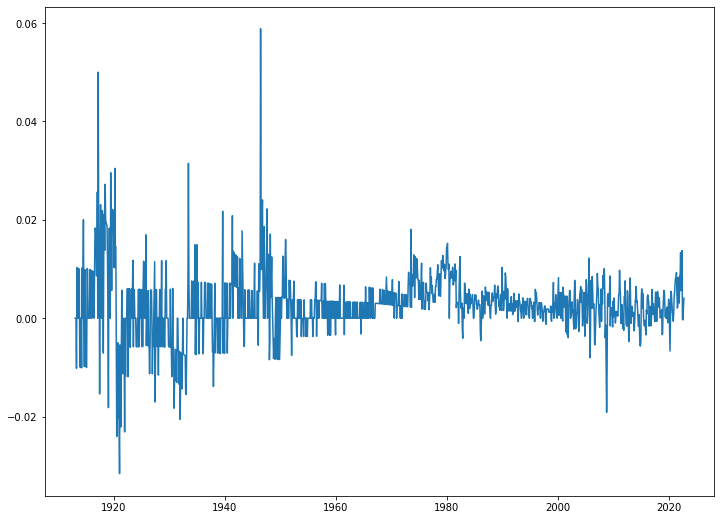

In [110]:
with open('resource/asnlib/publicdata/monthly_inflation.pkl', 'rb') as f:
    monthly_inflation = pickle.load(f)
with open('resource/asnlib/publicdata/dates.pkl', 'rb') as f:
    dates = pickle.load(f)
plt.rcParams["figure.figsize"] = (12, 9)
plt.plot(dates[1:], monthly_inflation)


We see a lot of volitility over the first few decades. Let's look at the last 30 years...

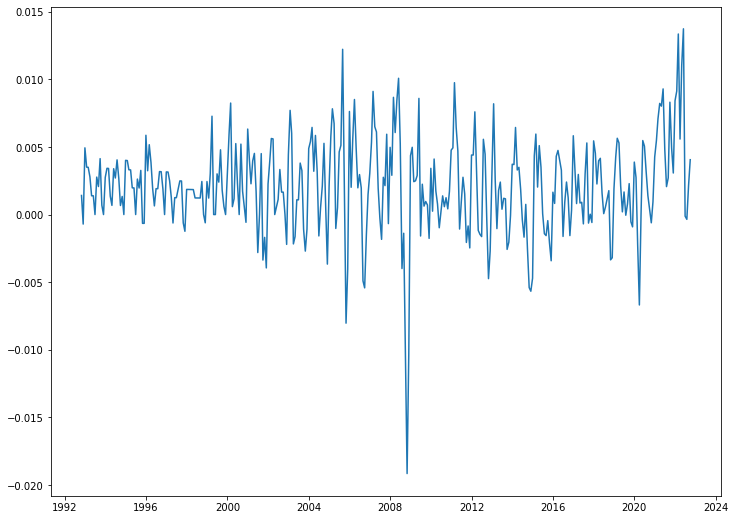

In [111]:
plt.plot(dates[-360:], monthly_inflation[-360:])

This looks like a more stationary time-series. There's one outlier in 2008. Aside from that it looks like the month-to-month inflation rate is bouncing around a more-or-less constant value.

Now, let's see what parameters we got from the grid search...

In [ ]:
with open('resource/asnlib/publicdata/simple_params.pkl', 'rb') as f:
    simple_params = pickle.load(f)
with open('resource/asnlib/publicdata/double_params.pkl', 'rb') as f:
    double_params = pickle.load(f)
print(f'Best simple params: {simple_params}')
print(f'Best double params: {double_params}')

There are two interesting take-aways from this choice of parameter. The first is from the `alpha` parameter. The value relatively close to 1 means that the best model takes 75% of it's prediction from the most recent observation and places relatively little importance on older observations. In layman's terms, the model does not think that the inflation rate is likely to change from whatever it was in the previous month.  

The second takeaway is that the `beta` parameter is 0. This means that the best model does not account for any trend. In other words if the inflation rate goes up in one month it does not imply that it will go up (or down) again in the following month. **Note**: The double exponential smoothing model with `beta=0` is equivalent to the simple exponential smoothing model!

Now, let's take a look at the predicted vs. observed inflation rates. We will look at a shorter time interval so it's easy to compare...

In [ ]:
with open('resource/asnlib/publicdata/simple_preds.pkl', 'rb') as f:
    simple_preds = pickle.load(f)
simple_mse = mse(monthly_inflation[-360:], simple_preds[-361:-1])
print(simple_mse)
plt.plot(dates[-120:], monthly_inflation[-120:], label='Observed', marker='o')
plt.plot(dates[-120:], simple_preds[-121:-1], label='Predicted', marker='x')
plt.legend()
plt.figure()
plt.plot(dates[-360:], monthly_inflation[-360:] - simple_preds[-361:-1], label='Residuals')
plt.legend()

The predictions are not terrible. There seems to be a sort of "seasonal rhythm" to the observations. We can account for seasonality by using a more complex model. We have fit and generated predictions using the Holt-Winters method (so-called triple exponential smoothing). This method accounts for signal, trend, and cyclal seasonal effects. Let's take a look!

In [ ]:
with open('resource/asnlib/publicdata/triple_preds.pkl', 'rb') as f:
    triple_preds = pickle.load(f)
triple_mse = mse(monthly_inflation[-360:], triple_preds[-361:-1])
print(triple_mse)
plt.plot(dates[-120:], monthly_inflation[-120:], label='Observed', marker='o')
plt.plot(dates[-120:], triple_preds[-121:-1], label='Predicted', marker='x')
plt.legend()
plt.figure()
plt.plot(dates[-360:], monthly_inflation[-360:] - triple_preds[-361:-1], label='Residuals')
plt.legend()

The Holt-Winters model did not offer much improvement.

Here's the take-aways from this analysis:  
1. There is no trend in month to month inflation rate. If it increases one month, that does not indicate that it is more or less likely to increase in the following month.
2. There is no seasonal component. We do not expect differences between observations made in January versus June (or any other combination of months).
3. There is some autoregressive component of the month to month inflation rate, but there are probably external factors which may provide additional predictive value.